In [5]:
import json
import pandas as pd

def extract_examples(file_path, correct, group, max_examples=20):
    examples = []
    
    with open(file_path, 'r') as file:
        for line in file:
            entry = json.loads(line)
            if (entry.get('correct') == correct and 
                entry.get('group') == group):
                examples.append(entry)
                if len(examples) >= max_examples:
                    break
    
    return examples

# Define the criteria
group = "Euskal gaiak"

# Extract examples for gpt-4-0125-preview
model_gpt4 = "gpt-4-0125-preview"
file_path_gpt4 = f"../results/{model_gpt4}"
file_name_gpt4 = f'{file_path_gpt4}/bertaqa_en_5-shot.jsonl'
examples_gpt4_correct = extract_examples(file_name_gpt4, True, group, max_examples=100)
examples_gpt4_incorrect = extract_examples(file_name_gpt4, False, group, max_examples=100)

# Extract examples for claude-3-opus-20240229
model_claude = "claude-3-opus-20240229"
file_path_claude = f"../results/{model_claude}"
file_name_claude = f'{file_path_claude}/bertaqa_en_5-shot.jsonl'
examples_claude_correct = extract_examples(file_name_claude, True, group, max_examples=100)
examples_claude_incorrect = extract_examples(file_name_claude, False, group, max_examples=100)

# Filter examples where both models answer correctly and both answer incorrectly
both_correct = [ex for ex in examples_gpt4_correct if ex['id'] in {ex_claude['id'] for ex_claude in examples_claude_correct}][:50]
both_incorrect = [ex for ex in examples_gpt4_incorrect if ex['id'] in {ex_claude['id'] for ex_claude in examples_claude_incorrect}][:50]

# Remove the messages and response fields, add model_answer field with the model's answer
for example in both_correct:
    example['candidate0'] = example['candidates'][0]
    example['candidate1'] = example['candidates'][1]
    example['candidate2'] = example['candidates'][2]
    del example['candidates']
    del example['response']
    del example['messages']
    del example['cost']
    del example['correct']
    del example['group']
    

for example in both_incorrect:
    example['candidate0'] = example['candidates'][0]
    example['candidate1'] = example['candidates'][1]
    example['candidate2'] = example['candidates'][2]
    del example['candidates']
    del example['response']
    del example['messages']
    del example['cost']
    del example['correct']
    del example['group']
    

# Print the extracted examples separately
print("Both Correct Examples:")
for i, example in enumerate(both_correct):
    print(f"{example['question']}")
    print(f"a) {example['candidate0']}")
    print(f"b) {example['candidate1']}")
    print(f"c) {example['candidate2']}")
    print(f"answer: {chr(97 + example['answer'])}")
    print()

print("Both Incorrect Examples:")
for i, example in enumerate(both_incorrect):
    print(f"{example['question']}")
    print(f"a) {example['candidate0']}")
    print(f"b) {example['candidate1']}")
    print(f"c) {example['candidate2']}")
    print(f"answer: {chr(97 + example['answer'])}")
    print()

# Save the examples to separate CSV files with 'answer' as the last column
df_both_correct = pd.DataFrame(both_correct)
df_both_incorrect = pd.DataFrame(both_incorrect)

# Reorder columns to make 'answer' the last column
columns_correct = [col for col in df_both_correct.columns if col != 'answer'] + ['answer']
columns_incorrect = [col for col in df_both_incorrect.columns if col != 'answer'] + ['answer']

df_both_correct = df_both_correct[columns_correct]
df_both_incorrect = df_both_incorrect[columns_incorrect]

df_both_correct.to_csv('both_correct_examples.csv', index=False)
df_both_incorrect.to_csv('both_incorrect_examples.csv', index=False)


Both Correct Examples:
What's the name of the film based on Bernardo Atxaga's novel "Obabakoak"?
a) "Obabakoak"
b) "Obaba"
c) "Obabako istorioak"
answer: b

Where's Atxondo?
a) In Biscay
b) In Gipuzkoa
c) In Navarre
answer: a

How long, more or less, did the episodes of "Bertan zoro" last?
a) 90 minutes
b) 60 minutes
c) 30 minutes
answer: c

Which film was a box office success for the "Frontera Films Irun" production company?
a) "Alquezar"
b) "Ama Lur"
c) "Pelotari"
answer: b

Where was Julian Retegi born?
a) Areso
b) Eratsun
c) Eraso
answer: b

Which of the following is a Basque Government institution?
a) IKA
b) AEK
c) HABE
answer: c

How long does the Bilbao Aste Nagusia or Great Week last?
a) 12 days
b) 9 days
c) 7 days
answer: b

What or who was Banu Qasi?
a) A former king of Navarre
b) A powerful Muslim tribe
c) An important historian from the Northern Basque Country
answer: b

Who built the Gaztelu Berria or Château-Neuf in Bayonne?
a) The English
b) The French
c) The Spanish
ans

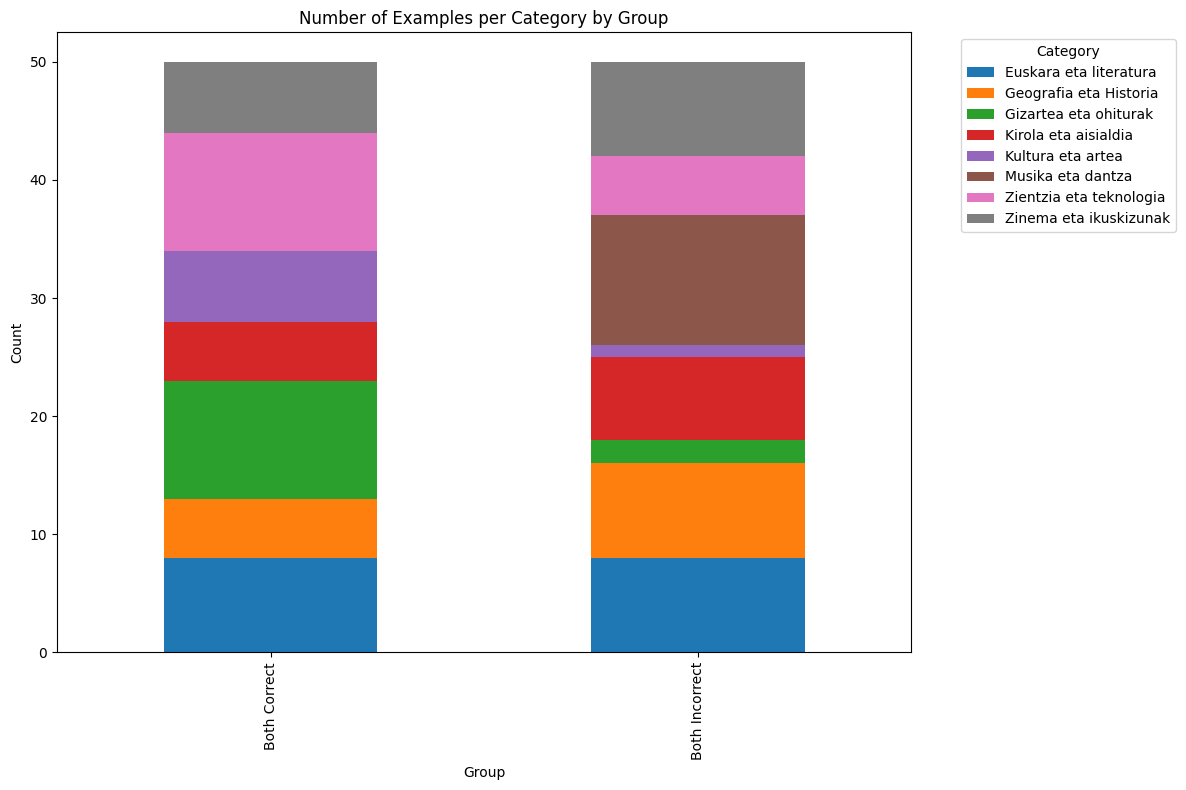

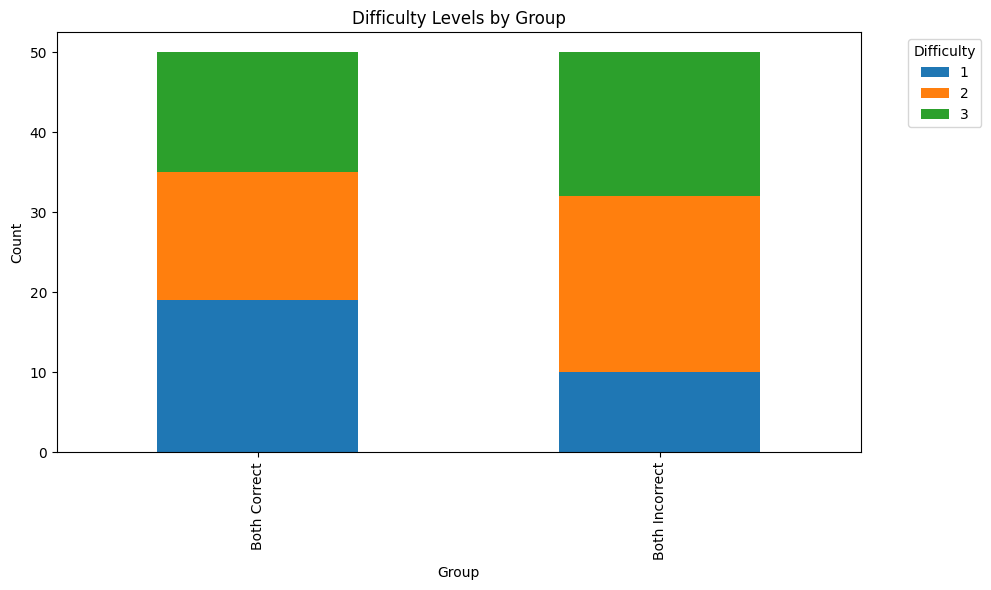

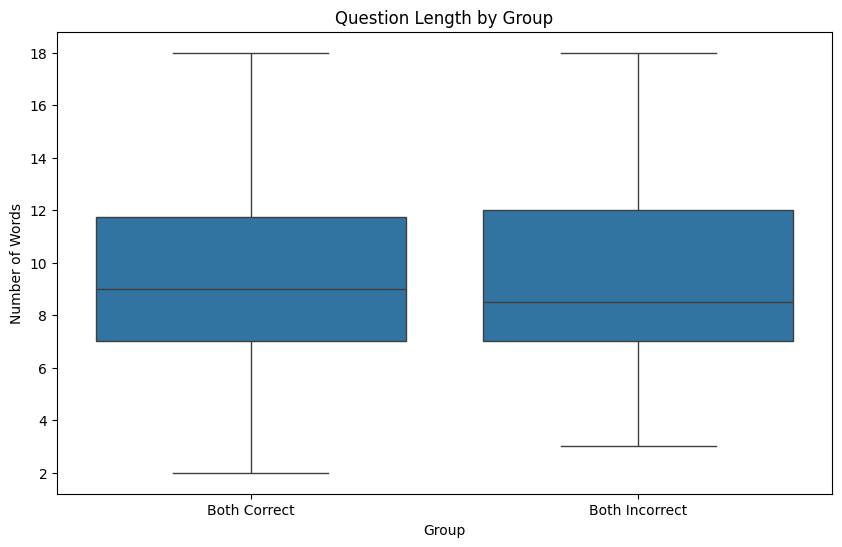

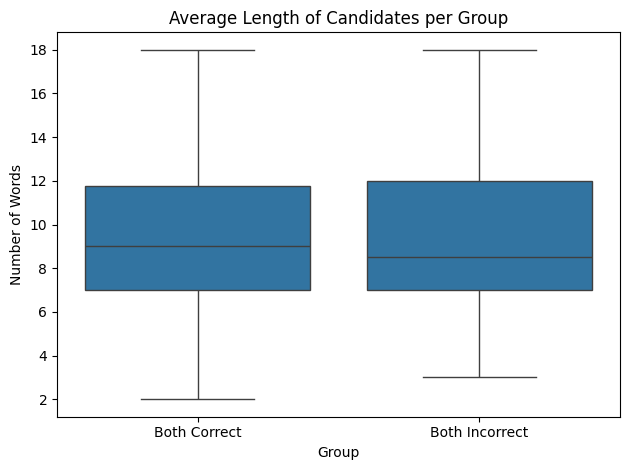

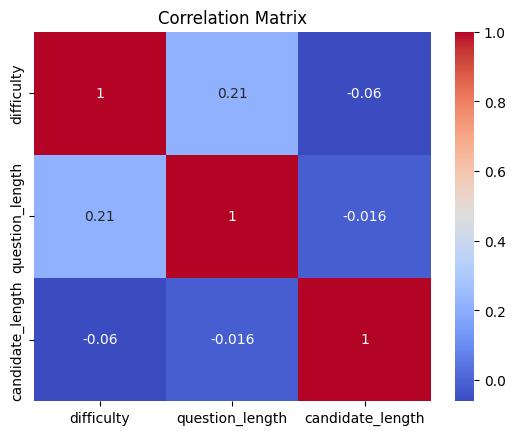

Error analysis completed. Refer to the generated plots for patterns and insights.


In [17]:
# Python

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load JSON data
def load_json(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return data

# Load both_correct_examples.json
both_correct = load_json('both_correct_examples.json')
df_correct = pd.DataFrame(both_correct)

# Load both_incorrect_examples.json
both_incorrect = load_json('both_incorrect_examples.json')
df_incorrect = pd.DataFrame(both_incorrect)

# Add a 'group' column to differentiate
df_correct['group'] = 'Both Correct'
df_incorrect['group'] = 'Both Incorrect'

# Combine datasets
df_combined = pd.concat([df_correct, df_incorrect], ignore_index=True)

# Data Cleaning
# Fill missing categories or groups if any
df_combined['category'] = df_combined['category'].fillna('Unknown')
df_combined['group'] = df_combined['group'].fillna('Unknown')

# Convert 'difficulty' to categorical
df_combined['difficulty'] = df_combined['difficulty'].astype(str)

# Exploratory Data Analysis

# Category Analysis
category_counts = df_combined.groupby(['group', 'category']).size().unstack(fill_value=0)
category_counts.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Number of Examples per Category by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Difficulty Level Analysis
difficulty_counts = df_combined.groupby(['group', 'difficulty']).size().unstack(fill_value=0)
difficulty_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Difficulty Levels by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.legend(title='Difficulty', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Question Length Analysis
df_combined['question_length'] = df_combined['question'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,6))
sns.boxplot(x='group', y='question_length', data=df_combined)
plt.title('Question Length by Group')
plt.xlabel('Group')
plt.ylabel('Number of Words')
plt.show()

# Candidate Analysis
df_combined['candidate_length'] = df_combined['candidates'].apply(lambda x: sum(len(candidate) for candidate in x) / len(x))
sns.boxplot(x='group', y='question_length', data=df_combined)
plt.title('Average Length of Candidates per Group')
plt.xlabel('Group')
plt.ylabel('Number of Words')
plt.tight_layout()
plt.show()

# Correlation Analysis
corr = df_combined[['difficulty', 'question_length', 'candidate_length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Conclusions
# (This section can be expanded based on the visualizations and analysis results)
print("Error analysis completed. Refer to the generated plots for patterns and insights.")